# TODO:
- Load models from experiments
- Calculate the pydots etc. 
- Plot convergence, compare to the posterior collapse, direct confounding and true values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CEVAE import *
from cevaetools import *
%load_ext autoreload
%autoreload 2

In [10]:
#Load the data generator
from datagenVAE import GenericDataset, train_datagenerator, savemodel, loadmodel, trainZtoTmodel, dataGeneratorVAE, FullyConnected
x_dim=25
original_data_dim = 25
z_dim=10
device='cpu'
x_mode=[0]*3+[4]+[0]*2+[2]*(x_dim-6)
proxymodel = loadmodel(name="proxygenerator", modeltype=dataGeneratorVAE, args=[x_dim, z_dim, device, 3, 30, 3, 30, x_mode])

In [5]:
#Load t generator
model_zt = loadmodel("ztotgenerator4", modeltype=FullyConnected, args=[[1]+[10]*3+[1]])

In [6]:
from datagenVAE import generatedata, rejection_sample

In [130]:
main_folder = "realdataz5"
sub_folder_data = "ATE0.5samplesize20000times10"
ATE = 0.5
zvar_index = 5
dataparameters = [20000, proxymodel, model_zt, ATE, zvar_index]
generate_df = generatedata
param_times=10
dfs, datasets = load_dfs(main_folder, sub_folder_data, param_times)

In [132]:
num_epochs=200
lr_start=0.001
lr_end=0.00001
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=0
x_mode=np.delete(np.array([0]*3+[4]+[0]*2+[2]*(original_data_dim-6)),zvar_index)
x_dim = len(x_mode)
ty_separate_enc=True
z_mode=0
x_loss_scaling=[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
labels = x_loss_scaling
common_stds = False

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "ATE0.5zdim10samplesize20000modelsscalings"
models_zdim10, losses_zdim10 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [133]:
z_dim=1

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "ATE0.5zdim1samplesize20000modelsscalings"
models_zdim1, losses_zdim1 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [134]:
#Load the ATE=1 data set
sub_folder = "ATE1samplesize20000times10"
dfs_ate05, datasets_ate05 = load_dfs(main_folder, sub_folder, param_times)

In [135]:
z_dim=10

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "ATE1zdim10samplesize20000modelsscalings"

models_zdim10_ate1, losses_zdim10_ate1 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [136]:
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "ATE1zdim10samplesize20000modelsscalings_3"
models_zdim10_ate1_3, losses_zdim10_ate1_3 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)


sub_folder_model = "ATE1zdim10samplesize20000modelsscalings_2"
models_zdim10_ate1_2, losses_zdim10_ate1_2 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

# Plot stuff
- True pydot0 = 0, pydot1 = 0.5 or 1

In [140]:
pydot1_zdim10 = np.zeros((param_times, len(labels)))
pydot1_zdim1 = np.zeros((param_times, len(labels)))
pydot0_zdim10 = np.zeros((param_times, len(labels)))
pydot0_zdim1 = np.zeros((param_times, len(labels)))
pydot1_zdim10_ate1 = np.zeros((param_times*3, len(labels)))
pydot0_zdim10_ate1 = np.zeros((param_times*3, len(labels)))

for i,label in enumerate(map(str,labels)):
    print(label)
    for j in range(param_times):
        py_dot = estimate_model_py_dot(models_zdim10[label][j],n=10000)
        pydot1_zdim10[j,i] = py_dot[1]
        pydot0_zdim10[j,i] = py_dot[0]
        py_dot = estimate_model_py_dot(models_zdim1[label][j],n=10000)
        pydot1_zdim1[j,i] = py_dot[1]
        pydot0_zdim1[j,i] = py_dot[0]
        py_dot = estimate_model_py_dot(models_zdim10_ate1[label][j],n=10000)
        pydot1_zdim10_ate1[j,i] = py_dot[1]
        pydot0_zdim10_ate1[j,i] = py_dot[0]
    for j in range(param_times):
        py_dot = estimate_model_py_dot(models_zdim10_ate1_2[label][j],n=10000)
        pydot1_zdim10_ate1[param_times+j,i] = py_dot[1]
        pydot0_zdim10_ate1[param_times+j,i] = py_dot[0]
        py_dot = estimate_model_py_dot(models_zdim10_ate1_3[label][j],n=10000)
        pydot1_zdim10_ate1[param_times*2+j,i] = py_dot[1]
        pydot0_zdim10_ate1[param_times*2+j,i] = py_dot[0]

1
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


In [110]:
zvar_index = 5
ATE = 0.5
true_estimated_pydot1 = np.zeros(20)
true_estimated_pydot0 = np.zeros(20)
for i in range(20):
    df = generatedata(20000, proxymodel, model_zt, ATE, zvar_index)
    from sklearn.linear_model import LinearRegression
    lr1 = LinearRegression().fit(df['z'][df['t']==1].to_numpy()[:,None],df['y'][df['t']==1].to_numpy()[:,None])
    lr0 = LinearRegression().fit(df['z'][df['t']==0].to_numpy()[:,None],df['y'][df['t']==0].to_numpy()[:,None])
    true_pydot1 = lr1.predict(df['z'][:,None]).mean()
    true_pydot0 = lr0.predict(df['z'][:,None]).mean()
    true_estimated_pydot1[i] = true_pydot1
    true_estimated_pydot0[i] = true_pydot0

In [111]:
df = dfs['df20000'][0]
from sklearn.ensemble import RandomForestRegressor
cols = df.columns.str.startswith("x")
rf1 = RandomForestRegressor().fit(df.iloc[:,cols].loc[df.t==1], df["y"][df.t==1])
rf0 = RandomForestRegressor().fit(df.iloc[:,cols].loc[df.t==0], df["y"][df.t==0])
direct_pydot1 = rf1.predict(df.iloc[:,cols]).mean()
direct_pydot0 = rf0.predict(df.iloc[:,cols]).mean()

In [112]:
pc_pydot1 = df[df['t']==1]['y'].mean()
pc_pydot0 = df[df['t']==0]['y'].mean()

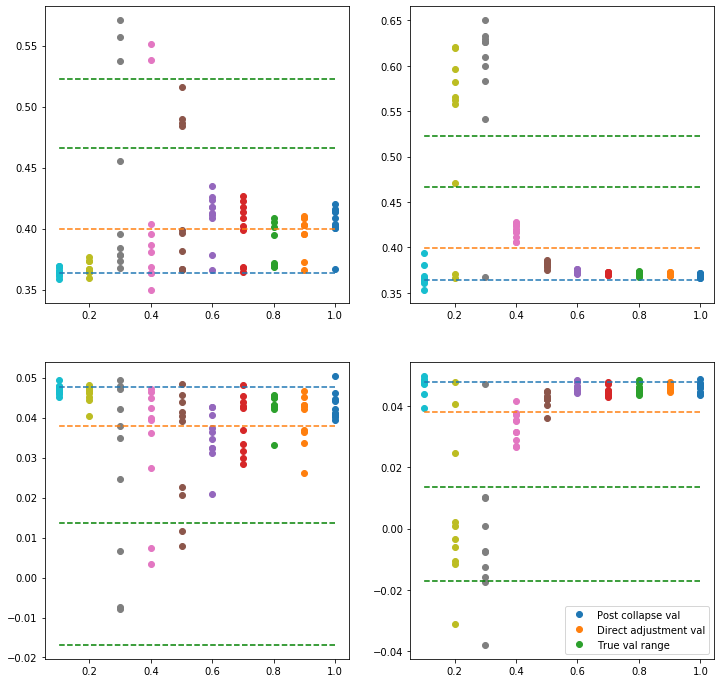

In [117]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
for i,label in enumerate(labels):
    ax[0,0].plot([label]*param_times, pydot1_zdim10[:,i], 'o')
    ax[0,1].plot([label]*param_times, pydot1_zdim1[:,i], 'o')
    ax[1,0].plot([label]*param_times, pydot0_zdim10[:,i], 'o')
    ax[1,1].plot([label]*param_times, pydot0_zdim1[:,i], 'o')
for i in range(2):
    ax[0,i].plot([labels[0],labels[-1]],[pc_pydot1, pc_pydot1], '--')
    ax[0,i].plot([labels[0],labels[-1]],[direct_pydot1, direct_pydot1], '--')
    ax[0,i].plot([labels[0],labels[-1]],[true_estimated_pydot1.max(), true_estimated_pydot1.max()], '--', c='green')
    ax[0,i].plot([labels[0],labels[-1]],[true_estimated_pydot1.min(), true_estimated_pydot1.min()], '--', c='green')
    
    ax[1,i].plot([labels[0],labels[-1]],[pc_pydot0, pc_pydot0], '--')
    ax[1,i].plot([labels[0],labels[-1]],[direct_pydot0, direct_pydot0], '--')
    ax[1,i].plot([labels[0],labels[-1]],[true_estimated_pydot0.max(), true_estimated_pydot0.max()], '--', c='green')
    ax[1,i].plot([labels[0],labels[-1]],[true_estimated_pydot0.min(), true_estimated_pydot0.min()], '--', c='green')

ax[1,1].legend(["Post collapse val", "Direct adjustment val", "True val range"])
plt.show()

## ATE=1

In [137]:
zvar_index = 5
ATE = 1
true_estimated_pydot1 = np.zeros(20)
true_estimated_pydot0 = np.zeros(20)
for i in range(20):
    df = generatedata(20000, proxymodel, model_zt, ATE, zvar_index)
    from sklearn.linear_model import LinearRegression
    lr1 = LinearRegression().fit(df['z'][df['t']==1].to_numpy()[:,None],df['y'][df['t']==1].to_numpy()[:,None])
    lr0 = LinearRegression().fit(df['z'][df['t']==0].to_numpy()[:,None],df['y'][df['t']==0].to_numpy()[:,None])
    true_pydot1 = lr1.predict(df['z'][:,None]).mean()
    true_pydot0 = lr0.predict(df['z'][:,None]).mean()
    true_estimated_pydot1[i] = true_pydot1
    true_estimated_pydot0[i] = true_pydot0

In [204]:
df = generatedata(1000000, proxymodel, model_zt, ATE, zvar_index)
lr1 = LinearRegression().fit(df['z'][df['t']==1].to_numpy()[:,None],df['y'][df['t']==1].to_numpy()[:,None])
lr0 = LinearRegression().fit(df['z'][df['t']==0].to_numpy()[:,None],df['y'][df['t']==0].to_numpy()[:,None])
true_pydot1 = lr1.predict(df['z'][:,None]).mean()
true_pydot0 = lr0.predict(df['z'][:,None]).mean()

In [138]:
df = dfs_ate05['df20000'][0]
from sklearn.ensemble import RandomForestRegressor
cols = df.columns.str.startswith("x")
rf1 = RandomForestRegressor().fit(df.iloc[:,cols].loc[df.t==1], df["y"][df.t==1])
rf0 = RandomForestRegressor().fit(df.iloc[:,cols].loc[df.t==0], df["y"][df.t==0])
direct_pydot1 = rf1.predict(df.iloc[:,cols]).mean()
direct_pydot0 = rf0.predict(df.iloc[:,cols]).mean()

In [139]:
pc_pydot1 = df[df['t']==1]['y'].mean()
pc_pydot0 = df[df['t']==0]['y'].mean()

In [214]:
import seaborn as sns
palette = sns.color_palette("muted")
palette_2 = sns.color_palette("bright")
palette_3 = sns.color_palette("deep")

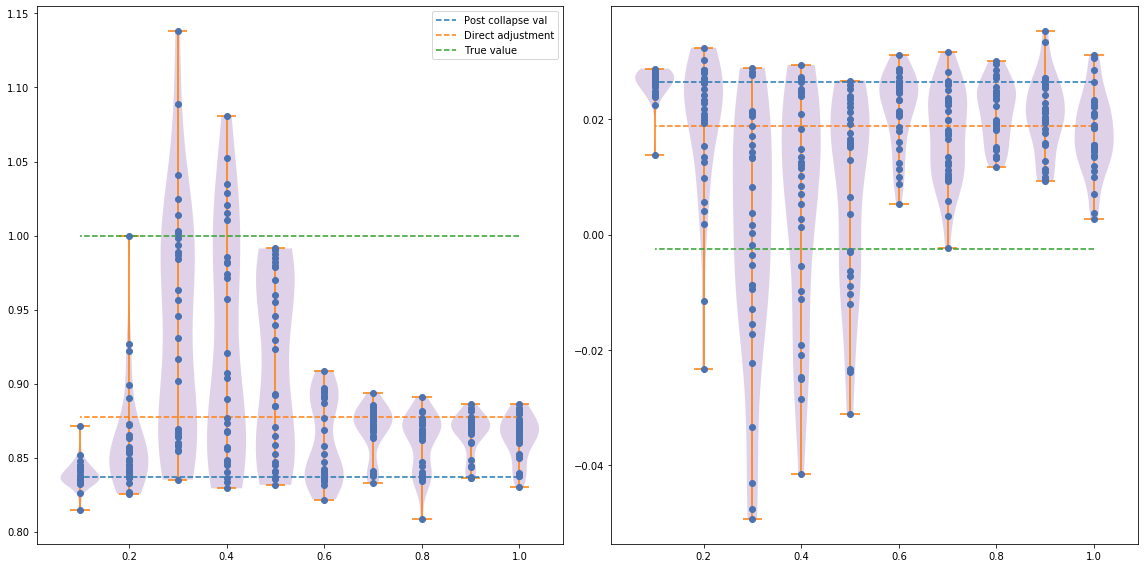

In [216]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].plot([labels[0],labels[-1]],[pc_pydot1, pc_pydot1], '--')
ax[0].plot([labels[0],labels[-1]],[direct_pydot1, direct_pydot1], '--')
#ax[0].plot([labels[0],labels[-1]],[true_estimated_pydot1.max(), true_estimated_pydot1.max()], '--', c='green')
#ax[0].plot([labels[0],labels[-1]],[true_estimated_pydot1.min(), true_estimated_pydot1.min()], '--', c='green')
ax[0].plot([labels[0],labels[-1]],[true_pydot1, true_pydot1], '--')
ax[1].plot([labels[0],labels[-1]],[pc_pydot0, pc_pydot0], '--')
ax[1].plot([labels[0],labels[-1]],[direct_pydot0, direct_pydot0], '--')
#ax[1].plot([labels[0],labels[-1]],[true_estimated_pydot0.max(), true_estimated_pydot0.max()], '--', c='green')
#ax[1].plot([labels[0],labels[-1]],[true_estimated_pydot0.min(), true_estimated_pydot0.min()], '--', c='green')
ax[1].plot([labels[0],labels[-1]],[true_pydot0, true_pydot0], '--')
ax[0].legend(["Post collapse val","Direct adjustment", "True value"])

for i,label in enumerate(labels):
    ax[0].plot([label]*param_times*3, pydot1_zdim10_ate1[:,i], 'o', color=palette_3[0])
    ax[1].plot([label]*param_times*3, pydot0_zdim10_ate1[:,i], 'o', color=palette_3[0])
    parts1 = ax[0].violinplot(pydot1_zdim10_ate1[:,i], [label],widths=0.08)
    parts0 = ax[1].violinplot(pydot0_zdim10_ate1[:,i], [label],widths=0.08)
    for pc in parts0['bodies']:
        pc.set_facecolor(palette[4])
    for pc in parts1['bodies']:
        pc.set_facecolor(palette[4])
    edgecoloridx = 1
    parts0['cbars']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cbars']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts0['cmaxes']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmaxes']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts0['cmins']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmins']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    #for pc in parts1['cbars']:
    #    pc.set_edgecolor(palette[1])

plt.tight_layout()
plt.savefig("Figures/publication/ihdp_losscaling_ate1.png")
plt.show()

In [191]:
parts1['cbars']._edgecolors
parts0

{'bodies': [<matplotlib.collections.PolyCollection at 0x20e08ee2408>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20e08f1f708>,
 'cmins': <matplotlib.collections.LineCollection at 0x20e08ee29c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x20e08f17848>}

In [87]:
true_estimated_pydot1.max()

1.0275516510009766

# Convergence

In [217]:
sub_folder_data = "ATE1samplesize1000to20000"
ATE = 1
zvar_index = 5
datasize = [1000,2000,3000,5000,10000,15000,20000]
dataparameters = [[num_samples, proxymodel, model_zt, ATE, zvar_index] for num_samples in datasize]
generate_df = generatedata
param_times=10
data_labels = list(map(str, datasize))

In [219]:
dfs, datasets = load_dfs(main_folder, sub_folder_data, param_times)

In [226]:
device = 'cpu'
num_epochs=200
lr_start=0.001
lr_end=0.00001
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=0
x_mode=np.delete(np.array([0]*3+[4]+[0]*2+[2]*(original_data_dim-6)),zvar_index)
x_dim = len(x_mode)
ty_separate_enc=True
z_mode=0
x_loss_scaling=1
labels = data_labels
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
sub_folder_model = "ATE1zdim10samplesize1000to20000"
labels = data_labels

models, losses = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [236]:
pydot1_ate1 = np.zeros((param_times, len(labels)))
pydot0_ate1 = np.zeros((param_times, len(labels)))

for i,label in enumerate(map(str,labels)):
    print(label)
    for j in range(param_times):
        py_dot = estimate_model_py_dot(models[label][j],n=10000)
        pydot1_ate1[j,i] = py_dot[1]
        pydot0_ate1[j,i] = py_dot[0]

1000
2000
3000
5000
10000
15000
20000


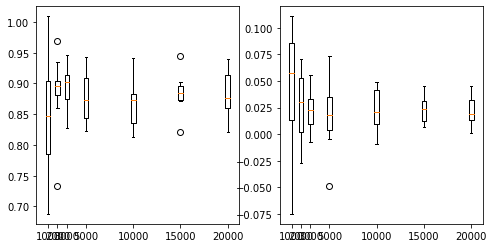

In [238]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].boxplot(pydot1_ate1,positions=datasize, widths=[500]*len(labels))
ax[1].boxplot(pydot0_ate1,positions=datasize, widths=[500]*len(labels))
plt.show()

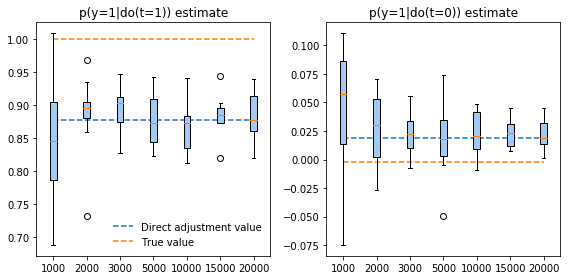

In [262]:
import seaborn as sns
from matplotlib.patches import Patch
fig, ax = plt.subplots(1,2,figsize=(8,4))
places = list(range(len(labels)))
width = 0.2
palette = sns.color_palette("pastel")
ax[0].plot([places[0],places[-1]],[direct_pydot1,direct_pydot1],'--')
ax[1].plot([places[0],places[-1]],[direct_pydot0,direct_pydot0],'--')
ax[0].plot([places[0],places[-1]],[true_pydot1,true_pydot1],'--')
ax[1].plot([places[0],places[-1]],[true_pydot0,true_pydot0],'--')
ax[0].legend(["Direct adjustment value","True value"], frameon=False)
ax[0].set_title("p(y=1|do(t=1)) estimate")
ax[1].set_title("p(y=1|do(t=0)) estimate")

for k,pydot in enumerate([pydot1_ate1,pydot0_ate1]):
    for i in range(len(labels)):
        bplot = ax[k].boxplot(pydot[:,i], positions=[places[i]], widths=[width], patch_artist=True)
        color = palette[0]
        for patch in bplot['boxes']:
            patch.set_facecolor(color)
    ax[k].set_xticks(places)
    ax[k].set_xticklabels(datasize)
    custom_line = Patch(facecolor=palette[0], edgecolor='black')

plt.tight_layout()
plt.savefig("Figures/publication/realdata_convergence_ate1.png", bbox_inches = 'tight', pad_inches = 0.1)
plt.show()